#Import parts

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Load MNIST Dataset and Convert to Float Variables

In [ ]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train /255.0 , x_test/ 255.0

11501568/11490434 [==============================] - 0s 0us/step


Create Neural Network Model Using Keras


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


Train and Evaluate the model


In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2999 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1445 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0737 - accuracy: 0.9767


In [ ]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0782 - accuracy: 0.9766 - 643ms/epoch - 2ms/step


[0.07816777378320694, 0.9765999913215637]

7


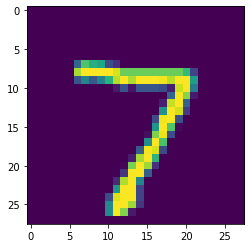

In [ ]:
print(np.argmax(model.predict(np.reshape(x_test[0], [-1, 28, 28]))))
plt.imshow(x_test[0])